# Part 2: Full Data Workflow A-Z

## Pandas GroupBy Operations

### Understanding GroupBy objects

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv("titanic.csv")

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [4]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
886,0,2,male,27.0,0,0,13.00,S,NaN
887,1,1,female,19.0,0,0,30.00,S,B
888,0,3,female,NaN,1,2,23.45,S,NaN
889,1,1,male,26.0,0,0,30.00,C,C
890,0,3,male,32.0,0,0,7.75,Q,NaN


In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [13]:
titanic_slice = titanic.loc[:10, ["age", "sex"]]

In [11]:
titanic_slice

,age,sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
5,NaN,male
6,54.0,male
7,2.0,male
8,27.0,female
9,14.0,female


In [14]:
titanic_slice.groupby("sex")

In [17]:
gbo = titanic_slice.groupby("sex")

In [18]:
gbo

In [16]:
type(gbo)

pandas.core.groupby.generic.DataFrameGroupBy

In [19]:
gbo.groups

{'female': [1, 2, 3, 8, 9, 10], 'male': [0, 4, 5, 6, 7]}

In [22]:
l = list(gbo)

In [23]:
l

[('female',
       age     sex
  1   38.0  female
  2   26.0  female
  3   35.0  female
  8   27.0  female
  9   14.0  female
  10   4.0  female),
 ('male',
      age   sex
  0  22.0  male
  4  35.0  male
  5   NaN  male
  6  54.0  male
  7   2.0  male)]

In [28]:
len(l)

2

In [29]:
l[0]

('female',
      age     sex
 1   38.0  female
 2   26.0  female
 3   35.0  female
 8   27.0  female
 9   14.0  female
 10   4.0  female)

In [30]:
type(l[0])

tuple

In [34]:
l[0][0]

'female'

In [35]:
l[0][1]

,age,sex
1,38.0,female
2,26.0,female
3,35.0,female
8,27.0,female
9,14.0,female
10,4.0,female


In [36]:
type(l[0][1])

pandas.core.frame.DataFrame

In [37]:
l[1]

('male',
     age   sex
 0  22.0  male
 4  35.0  male
 5   NaN  male
 6  54.0  male
 7   2.0  male)

In [38]:
titanic_slice.loc[titanic_slice.sex == "female"]

,age,sex
1,38.0,female
2,26.0,female
3,35.0,female
8,27.0,female
9,14.0,female
10,4.0,female


In [25]:
titanic_slice_f = titanic_slice.loc[titanic_slice.sex == "female"]
titanic_slice_f

,age,sex
1,38.0,female
2,26.0,female
3,35.0,female
8,27.0,female
9,14.0,female
10,4.0,female


In [26]:
titanic_slice_m = titanic_slice.loc[titanic_slice.sex == "male"]
titanic_slice_m

,age,sex
0,22.0,male
4,35.0,male
5,NaN,male
6,54.0,male
7,2.0,male


In [27]:
titanic_slice_f.equals(l[0][1])

True

In [ ]:
for element in gbo:
    print(element[1])

### Splitting with many Keys

In [42]:
import pandas as pd

In [43]:
summer = pd.read_csv("summer.csv")

In [44]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [45]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [46]:
summer.Country.nunique()

147

In [47]:
split1 = summer.groupby("Country")

In [48]:
l = list(split1)
l

[('AFG',
         Year     City      Sport Discipline           Athlete Country Gender  \
  28965  2008  Beijing  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  30929  2012   London  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  
              Event   Medal  
  28965     - 58 KG  Bronze  
  30929  58 - 68 KG  Bronze  ),
 ('AHO',
         Year   City    Sport Discipline          Athlete Country Gender  \
  19323  1988  Seoul  Sailing    Sailing  BOERSMA, Jan D.     AHO    Men   
  
                       Event   Medal  
  19323  Board (Division Ii)  Silver  ),
 ('ALG',
         Year         City      Sport Discipline               Athlete Country  \
  17060  1984  Los Angeles     Boxing     Boxing        ZAOUI, Mohamed     ALG   
  17064  1984  Los Angeles     Boxing     Boxing      MOUSSA, Mustapha     ALG   
  19874  1992    Barcelona  Athletics  Athletics    BOULMERKA, Hassiba     ALG   
  20200  1992    Barcelona     Boxing     Boxing       SOLTANI, Hocine  

In [49]:
len(l)

147

In [50]:
l[100][1]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5031,1928,Amsterdam,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5741,1932,Los Angeles,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5889,1932,Los Angeles,Athletics,Athletics,"TORIBIO, Simeon Galvez",PHI,Men,High Jump,Bronze
5922,1932,Los Angeles,Boxing,Boxing,"VILLANUEVA, Jose",PHI,Men,50.8 - 54KG (Bantamweight),Bronze
6447,1936,Berlin,Athletics,Athletics,"WHITE, Miguel S.",PHI,Men,400M Hurdles,Bronze
11005,1964,Tokyo,Boxing,Boxing,"VILLANUEVA, Anthony N.",PHI,Men,54 - 57KG (Featherweight),Silver
18513,1988,Seoul,Boxing,Boxing,"SERANTES, Leopoldo",PHI,Men,- 48KG (Light-Flyweight),Bronze
20184,1992,Barcelona,Boxing,Boxing,"VELASCO, Roel",PHI,Men,- 48KG (Light-Flyweight),Bronze
21927,1996,Atlanta,Boxing,Boxing,"VELASCO, Mansueto",PHI,Men,- 48KG (Light-Flyweight),Silver


In [51]:
split2 = summer.groupby(by = ["Country", "Gender"])

In [52]:
split2.max()

Year         City         Sport    Discipline  \
Country Gender                                                  
AFG     Men     2012       London     Taekwondo     Taekwondo   
AHO     Men     1988        Seoul       Sailing       Sailing   
ALG     Men     2012       Sydney          Judo          Judo   
        Women   2008       Sydney          Judo          Judo   
ANZ     Men     1912    Stockholm        Tennis        Tennis   
...              ...          ...           ...           ...   
YUG     Women   2000       Sydney  Table Tennis  Table Tennis   
ZAM     Men     1996  Los Angeles        Boxing        Boxing   
ZIM     Women   2008       Moscow        Hockey      Swimming   
ZZX     Men     1904     St Louis    Tug of War    Tug of War   
        Women   1900        Paris        Tennis        Tennis   

                                   Athlete                         Event  \
Country Gender                                                             
AFG     Men               NIKPAI, Rohullah                    58 - 68 KG   
AHO     Men                BOERSMA, Jan D.           Board (Division Ii)   
ALG     Men                 ZAOUI, Mohamed                     High Jump   
        Women         MERAH-BENIDA, Nouria  48 - 52KG (Half-Lightweight)   
ANZ     Men     WILDING, Anthony Frederick                Singles Indoor   
...                                    ...                           ...   
YUG     Women               WILD, Eleonora                      Handball   
ZAM     Men                   MWILA, Keith                  400M Hurdles   
ZIM     Women       WATSON, Linda Margaret                        Hockey   
ZZX     Men              WINCKLER, Charles                    Tug Of War   
        Women            ROSENBAUM, Hedwig                 Mixed Doubles   

                 Medal  
Country Gender          
AFG     Men     Bronze  
AHO     Men     Silver  
ALG     Men     Silver  
        Women     Gold  
ANZ     Men     Silver  
...                ...  
YUG     Women   Silver  
ZAM     Men     Silver  
ZIM     Women   Silver  
ZZX     Men     Silver  
        Women   Silver  

[236 rows x 7 columns]

In [ ]:
l2 = list(split2)
l2

In [ ]:
len(l2)

In [ ]:
l2[104]

In [ ]:
l2[104][0]

In [ ]:
l2[104][1]

### split-apply-combine explained

In [53]:
import pandas as pd

In [54]:
titanic = pd.read_csv("titanic.csv")

In [55]:
titanic_slice = titanic.iloc[:10, [2,3]]

In [56]:
titanic_slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [57]:
list(titanic_slice.groupby("sex"))[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [58]:
list(titanic_slice.groupby("sex"))[1][1]

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [59]:
titanic_slice.groupby("sex").mean()

,age
sex,
female,28.00
male,28.25


In [60]:
titanic.groupby("sex").survived.sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [ ]:
titanic.groupby("sex")[["fare", "age"]].max()

In [ ]:
new_df = titanic.groupby("sex").mean()

In [ ]:
new_df

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
new_df.plot(kind = "bar", subplots = True, figsize = (8,15), fontsize = 13)
plt.show()

### split-apply-combine applied

In [61]:
import pandas as pd

In [62]:
summer = pd.read_csv("summer.csv")

In [63]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [64]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [65]:
medals_per_country = summer.groupby("Country").Medal.count().nlargest(n = 20)
medals_per_country

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
Name: Medal, dtype: int64

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

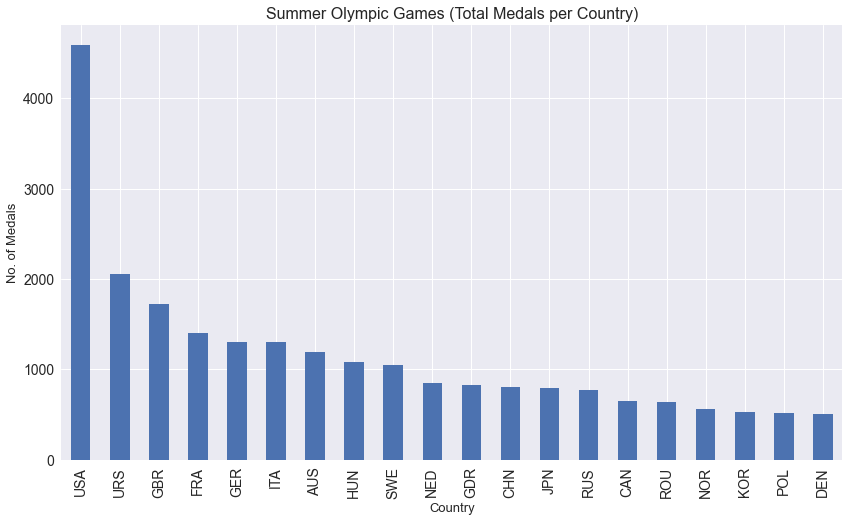

In [67]:
medals_per_country.plot(kind = "bar", figsize = (14, 8), fontsize = 14)
plt.xlabel("Country", fontsize = 13)
plt.ylabel("No. of Medals", fontsize = 13)
plt.title("Summer Olympic Games (Total Medals per Country)", fontsize = 16)
plt.show()

In [68]:
titanic = pd.read_csv("titanic.csv")

In [74]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [ ]:
titanic.info()

In [69]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
titanic.fare.mean()

32.2042079685746

In [76]:
titanic.groupby("pclass").fare.mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [77]:
titanic.survived.sum()

342

In [78]:
titanic.survived.mean()

0.3838383838383838

In [138]:
titanic.groupby("sex").survived.mean()


(2,)

AttributeError: 'Index' object has no attribute 'remove_unused_levels'

In [133]:
titanic.groupby("pclass")

In [131]:
titanic["ad_chi"] = "adult"

In [82]:
titanic.loc[titanic.age < 18, "ad_chi"] = "child"

In [83]:
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,ad_chi
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult
5,0,3,male,NaN,0,0,8.4583,Q,NaN,adult
6,0,1,male,54.0,0,0,51.8625,S,E,adult
7,0,3,male,2.0,3,1,21.0750,S,NaN,child
8,1,3,female,27.0,0,2,11.1333,S,NaN,adult
9,1,2,female,14.0,1,0,30.0708,C,NaN,child


In [84]:
titanic.ad_chi.value_counts()

adult    778
child    113
Name: ad_chi, dtype: int64

In [85]:
titanic.groupby("ad_chi").survived.mean()

ad_chi
adult    0.361183
child    0.539823
Name: survived, dtype: float64

In [86]:
titanic.groupby(["sex", "ad_chi"]).survived.count()

sex     ad_chi
female  adult     259
        child      55
male    adult     519
        child      58
Name: survived, dtype: int64

In [87]:
titanic.groupby(["sex", "ad_chi"]).survived.mean().sort_values(ascending = False)

sex     ad_chi
female  adult     0.752896
        child     0.690909
male    child     0.396552
        adult     0.165703
Name: survived, dtype: float64

In [91]:
w_and_c_first = titanic.groupby(["sex", "ad_chi"]).survived.mean().sort_values(ascending = False)

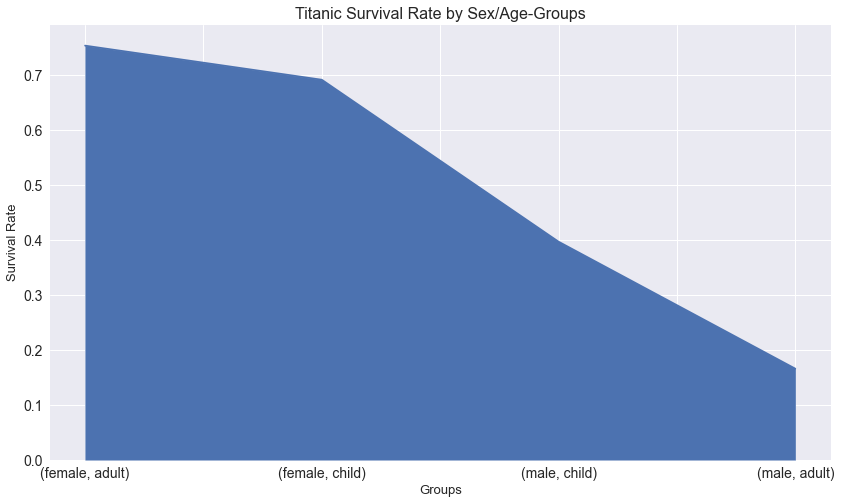

In [98]:
w_and_c_first.plot(kind = "area", figsize = (14,8), fontsize = 14)
plt.xlabel("Groups", fontsize = 13)
plt.ylabel("Survival Rate", fontsize = 13)
plt.title("Titanic Survival Rate by Sex/Age-Groups", fontsize = 16)
plt.show()

### Advanced Aggregation with agg()

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv("titanic.csv", usecols = ["survived", "pclass", "sex", "age", "fare"])

In [ ]:
titanic.head()

In [ ]:
titanic.groupby("sex").mean()

In [ ]:
titanic.groupby("sex").sum()

In [ ]:
titanic.groupby("sex").agg(["mean", "sum", "min", "max"])

In [ ]:
titanic.groupby("sex").agg({"survived": ["sum", "mean"], "pclass": "mean", "age": ["mean", "median"], "fare": "max"})

### GroupBy Aggregation with Relabeling (new in Version 0.25)

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv("titanic.csv", usecols = ["survived", "pclass", "sex", "age", "fare"])

In [ ]:
titanic.head()

In [ ]:
titanic.groupby("sex").survived.mean()

In [ ]:
titanic.groupby("sex").agg(survival_rate = ("survived", "mean"))

In [ ]:
titanic.groupby("sex").agg({"survived": ["sum", "mean"], "age": ["mean"]})

In [ ]:
titanic.groupby("sex").agg(survived_total = ("survived", "sum"), 
                           survival_rate = ("survived", "mean"), mean_age = ("age", "mean"))

### Transformation with transform()

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv("titanic.csv")

In [ ]:
titanic.head()

In [ ]:
titanic.groupby(["sex", "pclass"]).survived.transform("mean")

In [ ]:
titanic["group_surv_rate"] = titanic.groupby(["sex", "pclass"]).survived.transform("mean")

In [ ]:
titanic.head()

In [ ]:
titanic["outliers"] = abs(titanic.survived-titanic.group_surv_rate)

In [ ]:
titanic[titanic.outliers > 0.85]

### Replacing NA Values by group-specific Values

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv("titanic.csv")

In [ ]:
titanic.head(20)

In [ ]:
titanic.info()

In [ ]:
mean_age = titanic.age.mean()
mean_age

In [ ]:
titanic.age.fillna(mean_age)

In [ ]:
titanic.groupby(["sex", "pclass"]).age.mean()

In [ ]:
titanic["group_mean_age"] = titanic.groupby(["sex", "pclass"]).age.transform("mean")

In [ ]:
titanic.head(20)

In [ ]:
titanic.age.fillna(titanic.group_mean_age, inplace = True)

In [ ]:
titanic.head(20)

In [ ]:
titanic.info()

### Generalizing split-apply-combine with apply()

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv("titanic.csv", usecols = ["survived", "pclass", "sex", "age", "fare"])

In [ ]:
titanic.head()

In [ ]:
titanic.groupby("sex").mean()

In [ ]:
female_group = list(titanic.groupby("sex"))[0][1]
female_group

In [ ]:
female_group.mean().astype("float")

In [ ]:
def group_mean(group):
    return group.mean()

In [ ]:
group_mean(female_group)

In [ ]:
titanic.groupby("sex").apply(group_mean)

In [ ]:
titanic.nlargest(5, "age")

In [ ]:
def five_oldest_surv(group):
    return group[group.survived == 1].nlargest(5, "age")

In [ ]:
titanic.groupby("sex").apply(five_oldest_surv)

### Hierarchical Indexing (MultiIndex) with Groupby

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv("titanic.csv", usecols = ["survived", "pclass", "sex", "age", "fare"])

In [ ]:
titanic

In [114]:
summary = titanic.groupby(["sex", "pclass"]).mean()

In [115]:
summary

survived        age     sibsp     parch        fare
sex    pclass                                                     
female 1       0.968085  34.611765  0.553191  0.457447  106.125798
       2       0.921053  28.722973  0.486842  0.605263   21.970121
       3       0.500000  21.750000  0.895833  0.798611   16.118810
male   1       0.368852  41.281386  0.311475  0.278689   67.226127
       2       0.157407  30.740707  0.342593  0.222222   19.741782
       3       0.135447  26.507589  0.498559  0.224784   12.661633

In [ ]:
summary.index

In [ ]:
summary.loc[("female", 2), :]

In [ ]:
summary.loc[("female", 2), "age"]

In [ ]:
summary.swaplevel().sort_index()

In [ ]:
summary.reset_index()

### stack() and unstack()

In [99]:
import pandas as pd

In [100]:
summer = pd.read_csv("summer.csv")

In [101]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [107]:
medals_by_country = summer.groupby(["Country", "Medal"]).Medal.count()

In [108]:
medals_by_country

Country  Medal 
AFG      Bronze     2
AHO      Silver     1
ALG      Bronze     8
         Gold       5
         Silver     2
                   ..
ZIM      Gold      18
         Silver     4
ZZX      Bronze    10
         Gold      23
         Silver    15
Name: Medal, Length: 347, dtype: int64

In [109]:
medals_by_country.loc[("USA", "Gold")]

2235

In [110]:
medals_by_country.shape

(347,)

In [113]:
medals_by_country.unstack(level = 1)

Medal,Bronze,Gold,Silver
Country,,,
AFG,2.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,5.0,2.0
ANZ,5.0,20.0,4.0
ARG,91.0,69.0,99.0
...,...,...,...
VIE,NaN,NaN,2.0
YUG,118.0,143.0,174.0
ZAM,1.0,NaN,1.0


In [ ]:
medals_by_country = medals_by_country.unstack(level = -1, fill_value= 0)

In [ ]:
medals_by_country.head()

In [ ]:
medals_by_country.shape

In [ ]:
medals_by_country = medals_by_country[["Gold", "Silver", "Bronze"]]

In [ ]:
medals_by_country.sort_values(by = ["Gold", "Silver", "Bronze"], ascending = [False, False, False], inplace = True)

In [ ]:
medals_by_country.head(10)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
medals_by_country.head(10).plot(kind = "bar", figsize = (12,8), fontsize = 13)
plt.xlabel("Country", fontsize = 13)
plt.ylabel("Medals", fontsize = 13)
plt.title("Medals per Country", fontsize = 16)
plt.legend(fontsize = 15)
plt.show()

In [ ]:
medals_by_country.stack().unstack()